In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ortho_group
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks
from scipy.signal.windows import blackman
from scipy.interpolate import interp1d

from src.dt_helpers.network_dynamics import run_dynamics_step
from src.dt_helpers.plotters import visualize_network_activity
from src.dt_helpers.network_dynamics import compute_individual_neuron_frequency

#### Define network parameters

In [3]:
dt_s = 0.0001
# network weights
#   Exci.  Inhi.
#       0   -w31
#     w12      0
network_size = 2
taus_s = np.array([1])
network_input = np.array([1, 0])
alpha = dt_s / taus_s[0]
x = np.sqrt((1 - (1-alpha) ** 2) / alpha**2)
weights_12 = x
weights_21 = x
weights_13 = 0.5
weights_31 = 2
print("weight for oscillation:", x)

network_weights = np.array(
    [
        [0, -weights_21],
        [weights_12, 0],
    ]
)

# network_size = 3
# network_input = np.array([1, 0, 0])
# network_weights = np.array(
#     [
#         [0, -weights_21, -weights_31],
#         [weights_12, 0, 0],
#         [weights_13, 0, 0],
#     ]
# )
# taus_s = np.array([0.1, 0.1, 0.1])


weight for oscillation: 141.41782065918272


#### Run linear network

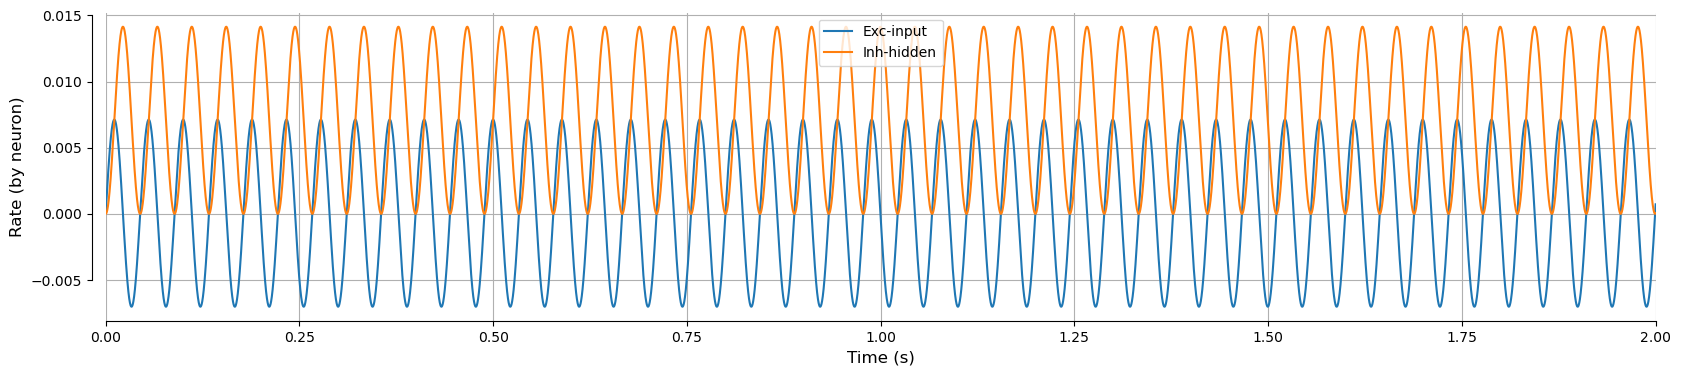

In [4]:
simulation_time_s = 2
num_time_steps = int(simulation_time_s / dt_s)
current_rates = np.zeros(network_size)
history_rates = []
for i in range(num_time_steps):
    current_rates = run_dynamics_step(
        current_rates=current_rates,
        network_input=network_input,
        weights=network_weights,
        taus=taus_s,
        dt=dt_s,
        noise=0,
        activations=lambda x: x,
    )
    history_rates.append(current_rates)
history_rates = np.array(history_rates)

visualize_network_activity(
    network_activity=history_rates,
    duration=simulation_time_s,
    dt=dt_s,
    num_steps=num_time_steps,
    title="",
    legend_labels=["Exc-input", "Inh-hidden"],
)

#### Run ReLU network

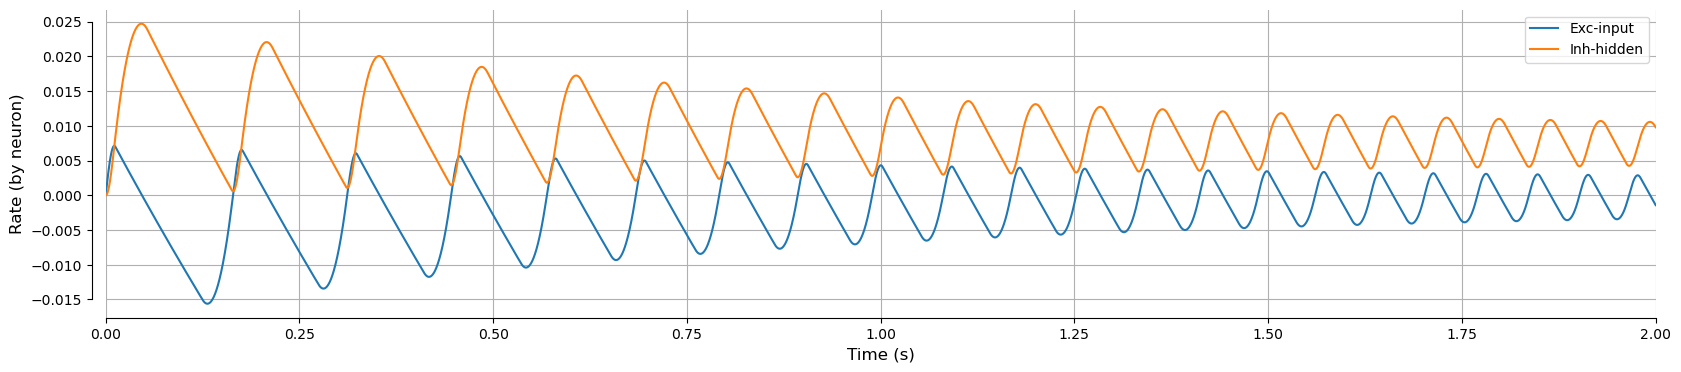

In [13]:
simulation_time_s = 2
num_time_steps = int(simulation_time_s / dt_s)
current_rates = np.zeros(network_size)
history_rates = []
for i in range(num_time_steps):
    current_rates = run_dynamics_step(
        current_rates=current_rates,
        network_input=network_input,
        weights=network_weights,
        taus=taus_s,
        dt=dt_s,
        noise=0,
        # noise=np.random.normal(0, 10, network_size),
        # activations=lambda x: np.maximum(x, 0, x),
        activations=lambda x: np.maximum(x, -0.2, x),
        # activations=lambda x: np.tanh(np.maximum(x, 0, x)),
    )
    history_rates.append(current_rates)
history_rates = np.array(history_rates)

visualize_network_activity(
    network_activity=history_rates,
    duration=simulation_time_s,
    dt=dt_s,
    num_steps=num_time_steps,
    title="",
    legend_labels=["Exc-input", "Inh-hidden"],
)

In [217]:
evals, evecs = np.linalg.eig(network_weights)
print("eigenvalues:", evals)
print("absolute eigenvalues:", np.abs(evals))
alpha = dt_s / taus_s[0]
evals, evecs = np.linalg.eig(np.eye(network_size) * (1 - alpha) + alpha * network_weights)
print("eigenvalues:", evals)
print("absolute eigenvalues:", np.abs(evals))

eigenvalues: [0.+44.5j 0.-44.5j]
absolute eigenvalues: [44.5 44.5]
eigenvalues: [0.999+0.0445j 0.999-0.0445j]
absolute eigenvalues: [0.99999062 0.99999062]


In [218]:
evals, evecs = np.linalg.eig(network_weights)
np.sqrt((1-alpha) ** 2 + (alpha * evals[0].imag) ** 2)

np.float64(0.9999906249560543)

In [227]:
np.sqrt((1-alpha) ** 2 + (alpha * np.sqrt((1 - (1-alpha) ** 2) / alpha**2)) ** 2)

np.float64(1.0)

In [228]:
np.sqrt((1 - (1-alpha) ** 2) / alpha**2)

np.float64(44.71017781221602)